In [1]:
from tensorflow import keras
import numpy as np

f_mnist = keras.datasets.fashion_mnist
(x_train_full, y_train_full), (x_test, y_test) = f_mnist.load_data()

x_train_full = np.reshape(x_train_full, (x_train_full.shape[0], x_train_full.shape[1] * x_train_full.shape[2]))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1] * x_test.shape[2]))

print(f"Training dataset: {x_train_full.shape}, {x_train_full.dtype}")
print(f"Testing dataset: {x_test.shape}, {x_test.dtype}")

x_train = x_train_full / 255.0
x_test = x_test / 255.0
y_train = y_train_full

2024-04-22 17:40:33.206907: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-22 17:40:33.212199: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-22 17:40:33.309226: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-22 17:40:33.309289: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-22 17:40:33.311554: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

Training dataset: (60000, 784), uint8
Testing dataset: (10000, 784), uint8


In [2]:
class_names = [
    'T-shirt',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

class_names[y_train[0]]

'Ankle boot'

In [3]:
from sklearn.tree import DecisionTreeClassifier

classifier_tree = DecisionTreeClassifier()
classifier_tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [4]:
from sklearn.neighbors import KNeighborsClassifier

classifier_kmeans = KNeighborsClassifier()
classifier_kmeans.fit(x_train, y_train)

KNeighborsClassifier()

In [5]:
from sklearn.svm import LinearSVC

# multiclasses shiuld be
classifier_svc = LinearSVC(dual=False)
classifier_svc.fit(x_train, y_train)

LinearSVC(dual=False)

In [6]:
from sklearn.linear_model import LogisticRegression

classifier_regression = LogisticRegression(solver = 'lbfgs')
classifier_regression.fit(x_train, y_train)

/home/suphomie/uni/homeworks-labs/machine-learning-tools/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [7]:
classifying_models = {
    'Decision Tree': classifier_tree,
    'K-Neighbors': classifier_kmeans,
    'C-Support Vector': classifier_svc,
    'Logistic Regression (aka logit, MaxEnt)': classifier_regression
}

In [8]:
%matplotlib inline

Оцінка точності Decision Tree: 0.7946
Звіт по класифікації Decision Tree:
              precision    recall  f1-score   support

     T-shirt       0.76      0.74      0.75      1000
     Trouser       0.96      0.95      0.95      1000
    Pullover       0.64      0.66      0.65      1000
       Dress       0.81      0.78      0.79      1000
        Coat       0.66      0.65      0.66      1000
      Sandal       0.91      0.89      0.90      1000
       Shirt       0.53      0.55      0.54      1000
     Sneaker       0.87      0.90      0.88      1000
         Bag       0.91      0.91      0.91      1000
  Ankle boot       0.91      0.91      0.91      1000

    accuracy                           0.79     10000
   macro avg       0.80      0.79      0.80     10000
weighted avg       0.80      0.79      0.80     10000



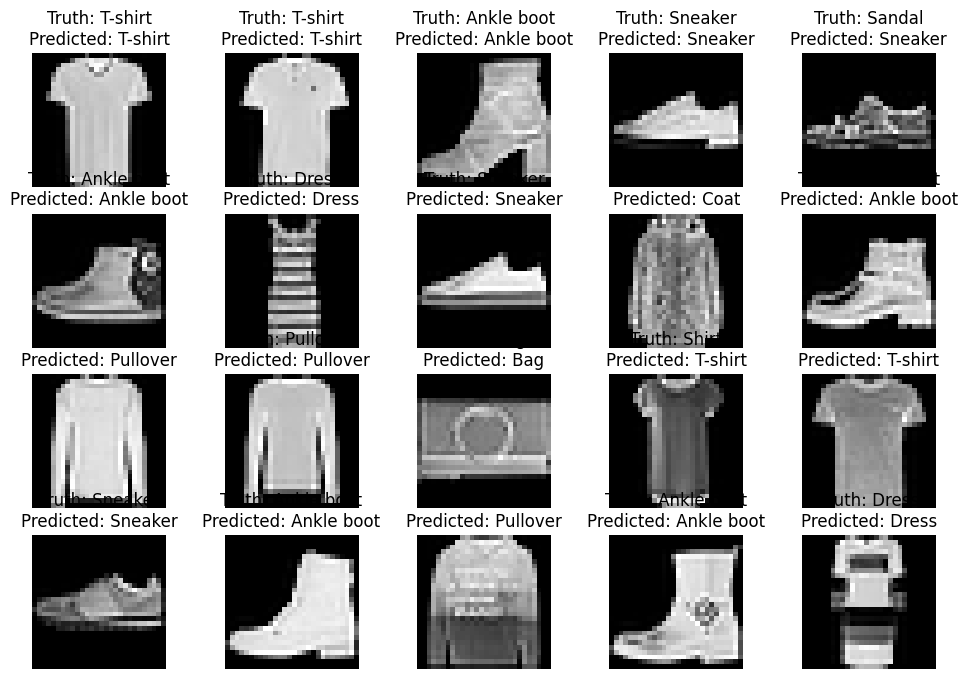

Оцінка точності K-Neighbors: 0.8554
Звіт по класифікації K-Neighbors:
              precision    recall  f1-score   support

     T-shirt       0.77      0.85      0.81      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.73      0.82      0.77      1000
       Dress       0.90      0.86      0.88      1000
        Coat       0.79      0.77      0.78      1000
      Sandal       0.99      0.82      0.90      1000
       Shirt       0.66      0.57      0.61      1000
     Sneaker       0.88      0.96      0.92      1000
         Bag       0.97      0.95      0.96      1000
  Ankle boot       0.90      0.97      0.93      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.85     10000
weighted avg       0.86      0.86      0.85     10000



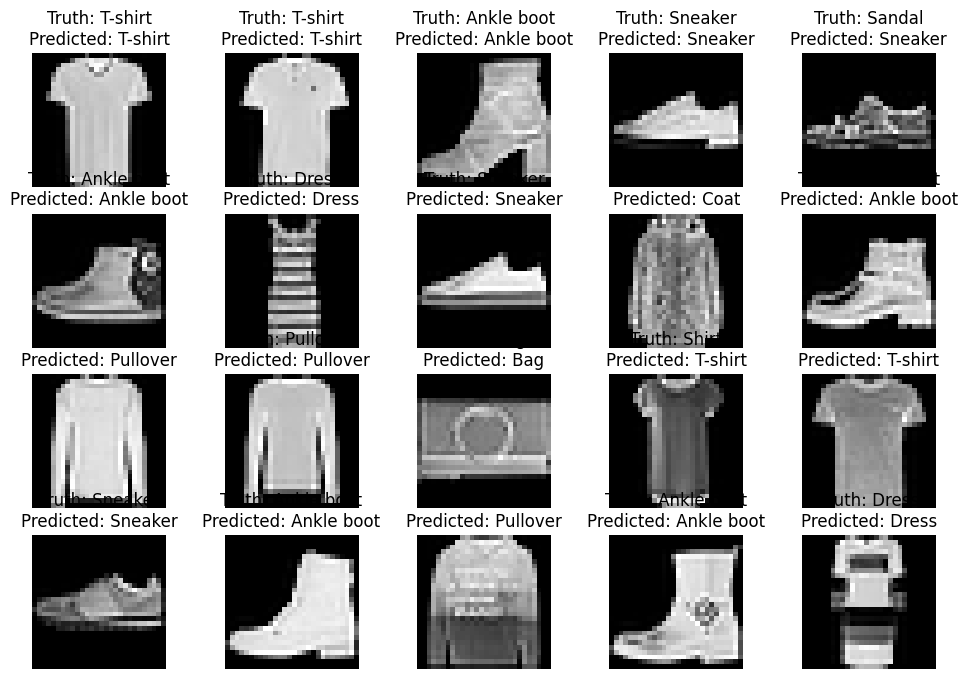

Оцінка точності C-Support Vector: 0.8403
Звіт по класифікації C-Support Vector:
              precision    recall  f1-score   support

     T-shirt       0.79      0.82      0.80      1000
     Trouser       0.97      0.95      0.96      1000
    Pullover       0.72      0.73      0.72      1000
       Dress       0.82      0.86      0.84      1000
        Coat       0.72      0.78      0.75      1000
      Sandal       0.94      0.92      0.93      1000
       Shirt       0.65      0.51      0.57      1000
     Sneaker       0.91      0.94      0.92      1000
         Bag       0.92      0.94      0.93      1000
  Ankle boot       0.95      0.94      0.95      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



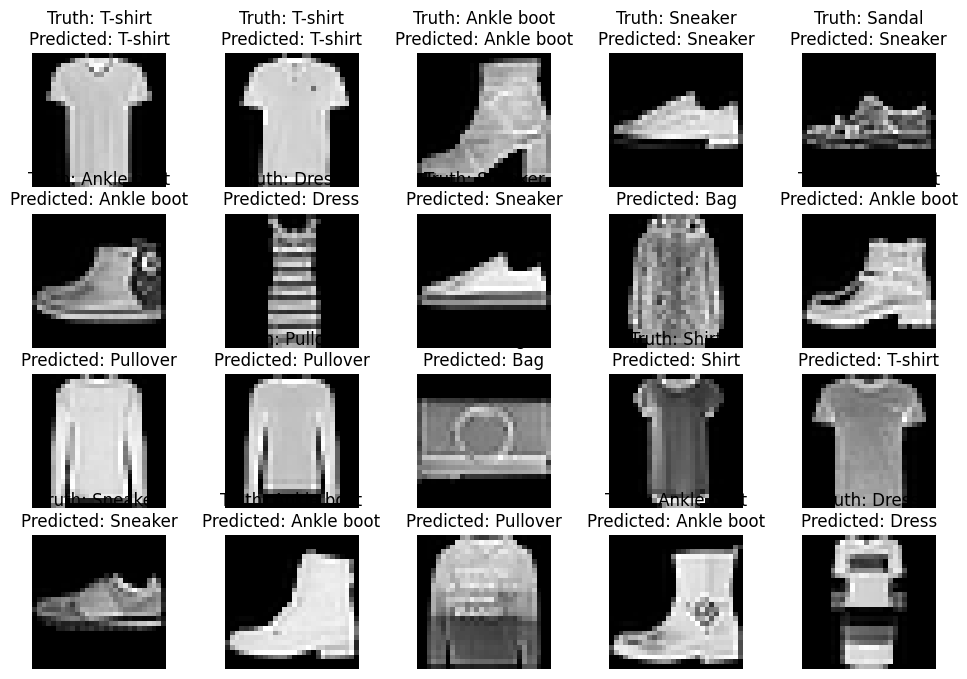

Оцінка точності Logistic Regression (aka logit, MaxEnt): 0.8439
Звіт по класифікації Logistic Regression (aka logit, MaxEnt):
              precision    recall  f1-score   support

     T-shirt       0.81      0.81      0.81      1000
     Trouser       0.97      0.96      0.97      1000
    Pullover       0.73      0.73      0.73      1000
       Dress       0.83      0.87      0.85      1000
        Coat       0.73      0.76      0.74      1000
      Sandal       0.94      0.93      0.93      1000
       Shirt       0.62      0.57      0.59      1000
     Sneaker       0.90      0.94      0.92      1000
         Bag       0.94      0.94      0.94      1000
  Ankle boot       0.95      0.94      0.94      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



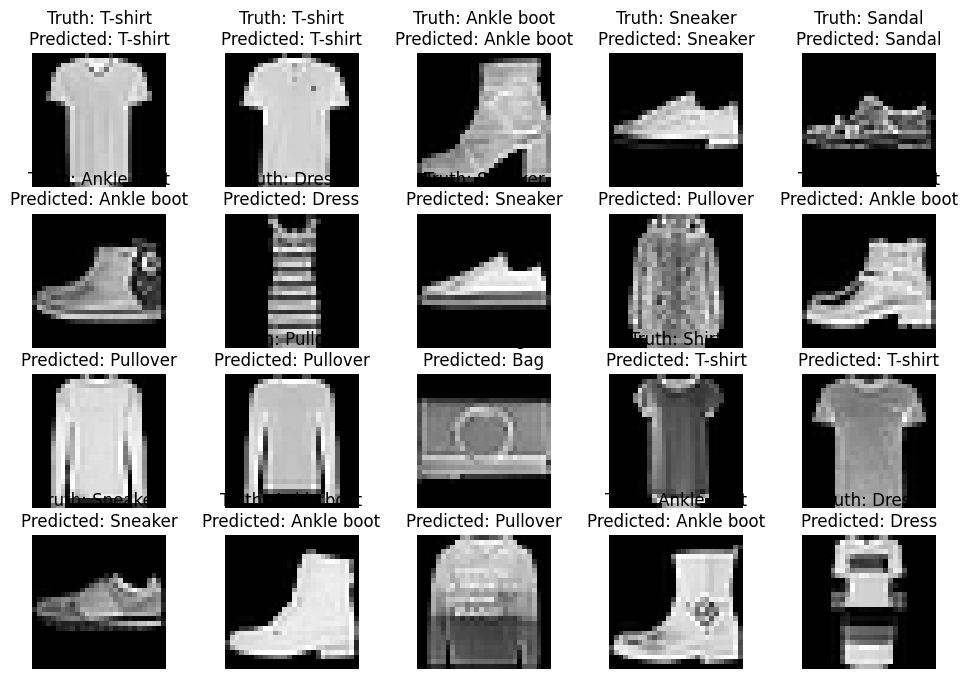

In [9]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import random


random_indices = random.sample(range(len(x_test)), 20)
x_sample = x_test[random_indices]
y_sample = y_test[random_indices]

for model_name, model in classifying_models.items():
    print(f"Оцінка точності {model_name}: {model.score(x_test, y_test)}")

    preds = model.predict(x_test)
    report = classification_report(y_test, preds, target_names=class_names)
    print(f"Звіт по класифікації {model_name}:\n{report}")
    
    rows = 4
    cols = 5
    fig, axs = plt.subplots(rows, cols, figsize=(12, 8))

    preds = model.predict(x_sample)
    for j in range(len(preds)):
        ax = axs[j // cols, j % cols]
        img = x_sample[j].reshape((28, 28))
        ax.imshow(img, cmap='gray')
        ax.set_title(f"Truth: {class_names[y_sample[j]]}\nPredicted: {class_names[preds[j]]}")
        ax.axis('off')
    plt.show()